# Amplitude Amplification

### Building superfast quantum algorithms using QSP and QSVT

So you've finally gone through and demonstrated that you can build a quantum signal processor. How can we now leverage the universality of the quantum singular value transform in order to build any quantum algorithm that demonstrates a speedup over classical algorithms?

In this notebook, we will be walking through an example of *amplitude amplification*—the core of quadratically fast quantum search—using the QSP basics that we developed in the previous notebook. Read more about the algorithm and amplitude amplification here: https://learning.quantum.ibm.com/course/fundamentals-of-quantum-algorithms/grovers-algorithm

The goal of this circuit is to demonstrate the successful use of amplitude amplification. Without loss of generality, we will rotate an arbitrary state into the zero state using the amplitude amplification algorithm and measure to check that this is correct.

In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService

lcl_token = "645380a31f6205f22ba863c090ee90aab9c3f55816a93e30775a53ced334f40e7f6b086b0def9155900edb2ff7f6184ed8035ab18bff8389c2cbe8fa34c8a705"

service = QiskitRuntimeService(
    channel="ibm_quantum", instance="ibm-q/open/main", token=lcl_token
)

In [2]:
from pyqsp.angle_sequence import QuantumSignalProcessingPhases
from pyqsp.response import PlotQSPResponse
from pyqsp.poly import StringPolynomial
from numpy.polynomial import Polynomial

We now repeat the process from QSP, with some key changes! Read the comments below to see what changes are used to apply the extra steps to build the amplitude amplification algorithm from our fundamental building blocks.

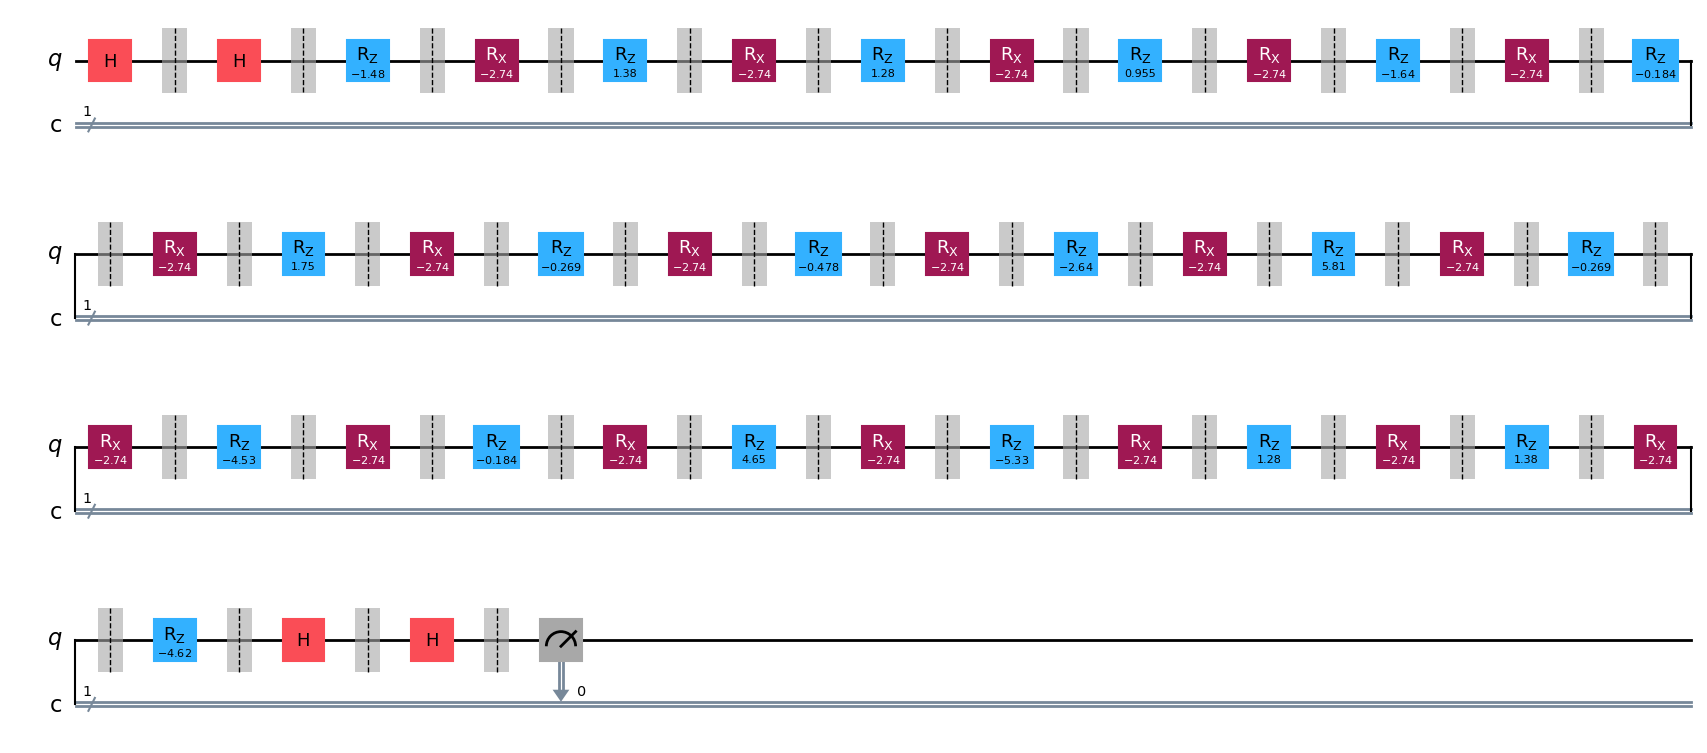

In [9]:
from qiskit import QuantumCircuit
import numpy as np
import matplotlib as mpl
import math

# Create the quantum circuit with the initial parameters
qc = QuantumCircuit(1,1)

# psi
#phi = get_phi(8)
phi = [0.73930816,
       -0.69010006,
       -0.63972139,
       -0.47754554,
        0.81797049,
        0.09205065,
        -0.87660105,
        0.13460844,
        0.23892207,
        1.32216648,
        -2.90267058,
        0.13460844,
        2.2649916,
        0.09205065,
        -2.32362216,
        2.66404712,
        -0.63972139,
        -0.69010006,
        2.31010449]

a = 0.2

# For the sake of experiment, prepare the qubit in the |+} state
# This is the FIRST state that we started at, where our rotations begin.
qc.h(0)
qc.barrier(0)


# Apply the quantum signal processor
qc.h(0)
qc.barrier(0)

# Generate the quantum signal processor sequences
for i in range(len(phi)):
    if(i != 0):
        qc.rx(-2*np.arccos(a),0)
        qc.barrier(0)
    qc.rz(-2*phi[i], 0)
    qc.barrier(0)

qc.h(0)

qc.barrier(0)

# Multiple-Hadamard unitaries to complete the rotation from the initial state into the final state
qc.h(0)
qc.barrier(0)

# measure all the qubits
qc.measure([0], [0])

qc.draw(output="mpl", style="iqp")

As visible, we have generated a new circuit, which sandwiches our quantum signal processing protocol with (1) an initial state and (2) unitaries to execute the rotation successfully. Let us now submit our data to the computers and see what we get!

In [10]:
from qiskit_ibm_runtime import Sampler, Options
backend_sim = service.backend("ibmq_qasm_simulator")

options = Options()
options.resilience_level = 1
options.optimization_level = 3

# Create an Estimator object
sampler = Sampler(backend_sim, options=options)

# Submit the circuit to Estimator
job = sampler.run(qc, shots=1000)

In [11]:
jobid = job.job_id()
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: cmvnfkkd06qe0i1kp3eg
>>> Job Status: JobStatus.DONE


In [12]:
retrieve_job = service.job(jobid)
result = retrieve_job.result()

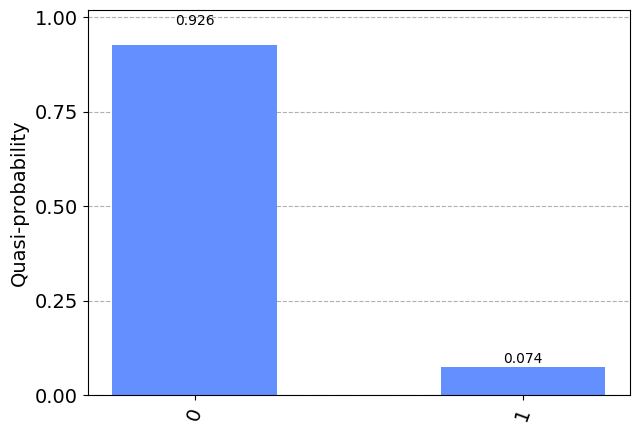

In [13]:
from qiskit.visualization import plot_distribution

plot_distribution(result.quasi_dists[0].binary_probabilities())

Et voilá! We note that starting from the |+> state, we were able to successfully amplify the |0> state after multiple shots. This demonstrates the tremendous power that QSP and QSVT have; amplitude amplification has been one of the hallmarks of efficent quantum computing algorithms, and it can be wholly represented by the base language of these protocols.

Based on this theoretical foundation, you can start to develop—and test—your own quantum algorithms. Our platform forms a launching pad, but it will be your destiny to fly to the moon from here. Here's to the quantum future!

___________________________________________

Work Copyright: Brennan Lagasse, Pranet Sharma, Frank Wong, George Holm, Diya Naik, © 2024 Yale University
